In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_train = pd.read_csv("./nlp-getting-started/train.csv")
df_test = pd.read_csv("./nlp-getting-started/test.csv")

In [3]:
                    df_train.sample(10)

,id,keyword,location,text,target
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7076,10137,upheaval,Woosley,Ancient Mayan Tablet with Hieroglyphics Honors...,0
3633,5182,fatalities,"Hope Road, Jamaica",'Use our roads wisely and prevent the carnage ...,0
6868,9842,trauma,NaN,What is the role of usg in paeds major trauma ...,0
2789,4012,disaster,en el pais de los arrechos,beautiful disaster https://t.co/qm5Sz0fyU8,0
3741,5317,fire,NaN,Why put out a fire when it's still burning.,0
6416,9174,suicide%20bomber,NaN,#deai #??? #??? #??? Suicide bomber kills 15 i...,1
3074,4410,electrocute,Naperville,Electrocute yourself,0
7449,10660,wounds,United States,Having your wounds kissed by Someone who doesn...,0
5205,7433,obliterated,Mid West,Obliterated my phone screen today with a drum ...,0


In [4]:
df_test.sample(10)

,id,keyword,location,text
2954,9789,trapped,USA,Hollywood Movie About Trapped Miners Released ...
2689,8960,storm,"Sunmy Melbourne, England",Want to know how to get the edge and storm Roc...
1333,4400,electrocute,Here.,hmm what if I've already met my special someon...
235,764,avalanche,"Saint Andrews, Scotland",As you can imagine I had plenty to talk about ...
1660,5597,flood,New York,12' 72W CREE LED Work Light Bar Alloy Spot Flo...
1352,4461,electrocuted,USA,South Side factory where worker electrocuted p...
1850,6239,hijacking,"Chinade, Nigeria",#hot Funtenna: hijacking computers to send da...
421,1364,blown%20up,"22714 Ventura Blvd. WHills, CA",Get blown up with a delicious flavor of #BlowV...
1634,5511,flattened,NaN,I think that's been the best bit of this match...
270,880,bioterrorism,Los Angeles,The largest bioterrorism attack on U.S. soil i...


In [5]:
print("Train data info \n")
df_train.info()
print("\nTest data info \n")
df_test.info()

Train data info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB

Test data info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
df_test.drop(['keyword', 'location','id'], axis = 1, inplace=True)
df_train.drop(['keyword', 'location','id'], axis = 1, inplace=True)

In [7]:
df_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df_test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
import re
def change_contraction_verb(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

df_train['text'] = df_train['text'].apply(lambda x : change_contraction_verb(x))
df_test['text'] = df_test['text'].apply(lambda x : change_contraction_verb(x))

In [10]:
df_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to ishelter in place' are...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def transform_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n', '', text)
    text = nltk.word_tokenize(text)
    
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stop_words and word not in string.punctuation]
    
    return " ".join(text)


/home/fernando/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
df_train['text'] = df_train['text'].apply(transform_text)

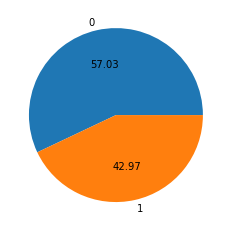

In [13]:
import matplotlib.pyplot as plt
plt.pie(df_train['target'].value_counts(), labels=['0','1'],autopct="%0.2f")
plt.show()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [15]:
X_tf = tfidf.fit_transform(df_train['text']).toarray()
y = df_train['target'].values
X_cv = cv.fit_transform(df_train['text']).toarray()


In [16]:
from sklearn.model_selection import train_test_split
X_train_tf,X_val_tf,y_train_tf,y_val_tf = train_test_split(X_tf,y,test_size=0.2,random_state=2)
X_train_cv,X_val_cv,y_train_cv,y_val_cv = train_test_split(X_cv,y,test_size=0.2,random_state=2)

In [17]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [18]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [19]:
print("For CountVectorizer")
gnb.fit(X_train_cv,y_train_cv)
y_pred1 = gnb.predict(X_val_cv)
print(accuracy_score(y_val_cv,y_pred1))
print(confusion_matrix(y_val_cv,y_pred1))
print(precision_score(y_val_cv,y_pred1))
print('\n')
print(" For Tfidf")
gnb.fit(X_train_tf,y_train_tf)
y_pred1 = gnb.predict(X_val_tf)
print(accuracy_score(y_val_tf,y_pred1))
print(confusion_matrix(y_val_tf,y_pred1))
print(precision_score(y_val_tf,y_pred1))

For CountVectorizer
0.6401838476690742
[[448 422]
 [126 527]]
0.5553213909378293


 For Tfidf
0.6467498358502954
[[473 397]
 [141 512]]
0.5632563256325632


In [20]:
print("For CountVectorizer")
bnb.fit(X_train_cv,y_train_cv)
y_pred1_cv = bnb.predict(X_val_cv)
print(accuracy_score(y_val_cv,y_pred1_cv))
print(confusion_matrix(y_val_cv,y_pred1_cv))
print(precision_score(y_val_cv,y_pred1_cv))
print('\n')
print(" For Tfidf")
bnb.fit(X_train_tf,y_train_tf)
y_pred1 = bnb.predict(X_val_tf)
print(accuracy_score(y_val_tf,y_pred1))
print(confusion_matrix(y_val_tf,y_pred1))
print(precision_score(y_val_tf,y_pred1))

For CountVectorizer
0.8082731451083388
[[773  97]
 [195 458]]
0.8252252252252252


 For Tfidf
0.8082731451083388
[[773  97]
 [195 458]]
0.8252252252252252


In [21]:
print("For CountVectorizer")
mnb.fit(X_train_cv,y_train_cv)
y_pred1_cv = mnb.predict(X_val_cv)
print(accuracy_score(y_val_cv,y_pred1_cv))
print(confusion_matrix(y_val_cv,y_pred1_cv))
print(precision_score(y_val_cv,y_pred1_cv))
print('\n')
print(" For Tfidf")
mnb.fit(X_train_tf,y_train_tf)
y_pred1 = mnb.predict(X_val_tf)
print(accuracy_score(y_val_tf,y_pred1))
print(confusion_matrix(y_val_tf,y_pred1))
print(precision_score(y_val_tf,y_pred1))

For CountVectorizer
0.8063033486539725
[[746 124]
 [171 482]]
0.7953795379537953


 For Tfidf
0.7997373604727511
[[771  99]
 [206 447]]
0.8186813186813187


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [24]:
def train_classifier(clf,X_train,y_train,X_val,y_val):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    
    return accuracy,precision

In [25]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [26]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_tf,y_train_tf,X_val_tf,y_val_tf)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7957977675640184
Precision -  0.8064516129032258
For  KN
Accuracy -  0.6723571897570584
Precision -  0.9375
For  NB
Accuracy -  0.7997373604727511
Precision -  0.8186813186813187
For  DT
Accuracy -  0.6565988181221274
Precision -  0.6326530612244898
For  LR
Accuracy -  0.7852921864740644
Precision -  0.7963636363636364
For  RF
Accuracy -  0.7820091923834537
Precision -  0.8092485549132948


In [27]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.672357,0.937500
2,NB,0.799737,0.818681
5,RF,0.782009,0.809249
0,SVC,0.795798,0.806452
4,LR,0.785292,0.796364
3,DT,0.656599,0.632653


In [28]:
df_test['text'] = df_test['text'].apply(transform_text)

In [29]:
test_tf = tfidf.fit_transform(df_test['text']).toarray()
predictions_nb = mnb.predict(test_tf)
predictions_nb

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
X = df_train['text']
y = df_train['target']

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional,Embedding,Dense,Dropout,LSTM,BatchNormalization
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2024-02-29 14:27:10.601376: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 14:27:10.758408: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 14:27:10.758456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 14:27:10.782858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 14:27:10.844075: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 14:27:10.845498: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [32]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [33]:
#Hyperparameters
vocab_size = 200000
max_len = 150

tokenizer = Tokenizer(oov_token='<OOV')

tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, truncating="post")

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, truncating='post')

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model = tf.keras.Sequential([
    Embedding(vocab_size, 64),
    BatchNormalization(),
    Bidirectional(LSTM(32)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='softmax'),

    
])


2024-02-29 14:27:13.271558: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51200000 exceeds 10% of free system memory.
2024-02-29 14:27:13.306099: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51200000 exceeds 10% of free system memory.
2024-02-29 14:27:13.333665: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51200000 exceeds 10% of free system memory.


In [35]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [36]:
history = model.fit(padded,y_train, epochs=20, validation_data=(testing_padded, y_test), callbacks=[early_stopping])

Epoch 1/20


2024-02-29 14:27:14.787537: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51200000 exceeds 10% of free system memory.
2024-02-29 14:27:14.793974: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51200000 exceeds 10% of free system memory.


191/191 [==============================] - 35s 169ms/step - loss: 0.5706 - accuracy: 0.4300 - val_loss: 0.6841 - val_accuracy: 0.4281
Epoch 2/20
191/191 [==============================] - 32s 167ms/step - loss: 0.2217 - accuracy: 0.4300 - val_loss: 0.6331 - val_accuracy: 0.4281
Epoch 3/20
191/191 [==============================] - 31s 165ms/step - loss: 0.0969 - accuracy: 0.4300 - val_loss: 0.5581 - val_accuracy: 0.4281
Epoch 4/20
191/191 [==============================] - 33s 174ms/step - loss: 0.0601 - accuracy: 0.4300 - val_loss: 0.7470 - val_accuracy: 0.4281
Epoch 5/20
191/191 [==============================] - 34s 177ms/step - loss: 0.0433 - accuracy: 0.4300 - val_loss: 0.7393 - val_accuracy: 0.4281
Epoch 6/20
191/191 [==============================] - 34s 178ms/step - loss: 0.0330 - accuracy: 0.4300 - val_loss: 0.8686 - val_accuracy: 0.4281


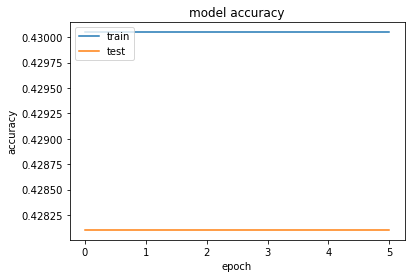

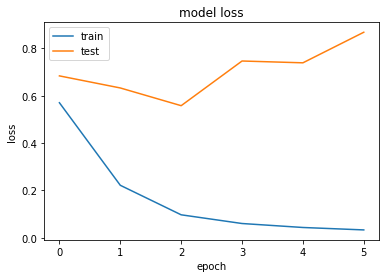

In [37]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [38]:
sample_submission=pd.read_csv('./nlp-getting-started/sample_submission.csv')
idd=sample_submission['id']

In [39]:
sub_df = pd.DataFrame({
    "id" : idd,
    "Target": predictions_nb
})
sub_df.head(10)

,id,Target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,1
5,12,0
6,21,0
7,22,1
8,27,0
9,29,1


In [40]:
sub_df.to_csv("submission.csv", index=False)

In [41]:
test_phrases = pd.DataFrame(data = {'tweet_text': 
                            ["Apocalypse lighting. #Spokane #wildfires", 
                             "No I don't like cold", 
                            #  "Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU", 
                            #  "@RobynJilllian @WlSDOMTEETHS I feel like I'm going to do it on accident. Teesha is gonna come out??"
                             ]})
# test_phrases = test_phrases["tweet_text"].apply(transform_text)

In [42]:
test_other = tfidf.fit_transform(test_phrases['tweet_text']).toarray()
predictions_nb = mnb.predict(test_tf)
predictions_nb

array([0, 0, 0, ..., 0, 1, 0])

what the heeeeelllll

In [43]:
sequences = tokenizer.texts_to_sequences(test_phrases.squeeze())
padded = pad_sequences(sequences, truncating="post")

testing_sequences = tokenizer.texts_to_sequences(test_phrases['tweet_text'])
testing_padded = pad_sequences(testing_sequences, truncating='post')
y_prob = model.predict(testing_padded)

y_classes = y_prob.argmax()
y_classes

1/1 [==============================] - 1s 533ms/step


0